# Machine, Data and Learning | Assignment 1

- Team No.: 97
- Team Name: Team Caffeine 
- Team Members: Gautam Ghai (2020101020), Lavisha Bhambri (2020101088)




In [ ]:
#import the required libraries
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

## Visualising the datasets 
First load them and plot both of them

In [ ]:
# loading the training set
trainName = 'train.pkl'
testName = 'test.pkl'
num_datasets = 16
degrees = 15
with open(trainName, 'rb') as f:
 file_train = pickle.Unpickler(f).load()
 train = pd.DataFrame(file_train, columns = ['X','Y']).sample(frac=1)

# loading the test set
with open(testName, 'rb') as f:
 file_test = pickle.Unpickler(f).load()
 test = pd.DataFrame(file_test, columns=['X', 'Y'])

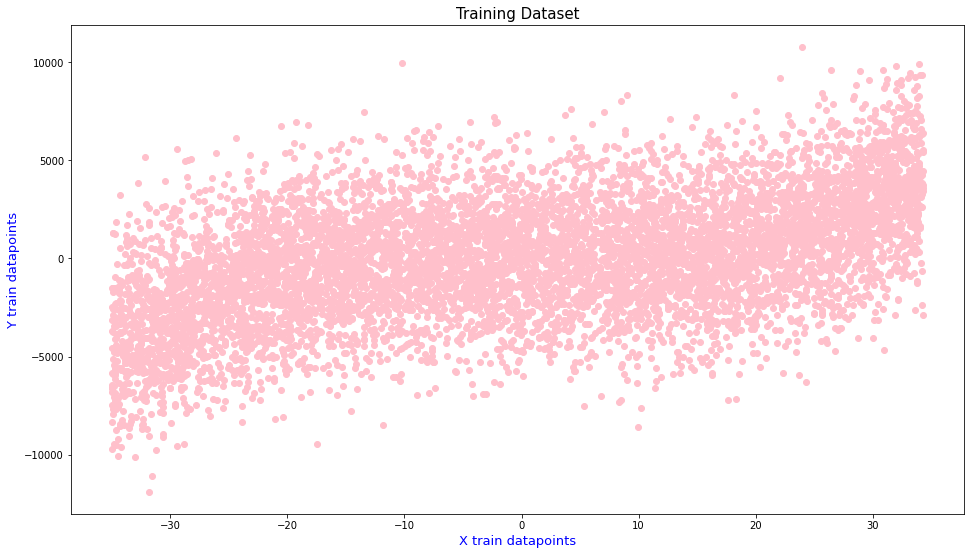

In [ ]:
# Plotting the Training set
plt.figure(figsize=(16, 9))
x_train = train['X']
y_train = train['Y']
plt.xlabel('X train datapoints', fontsize=13, color='blue')
plt.ylabel('Y train datapoints', fontsize=13, color='blue')
plt.scatter(x_train, y_train, color='pink')

plt.title('Training Dataset', fontsize=15)
plt.show()

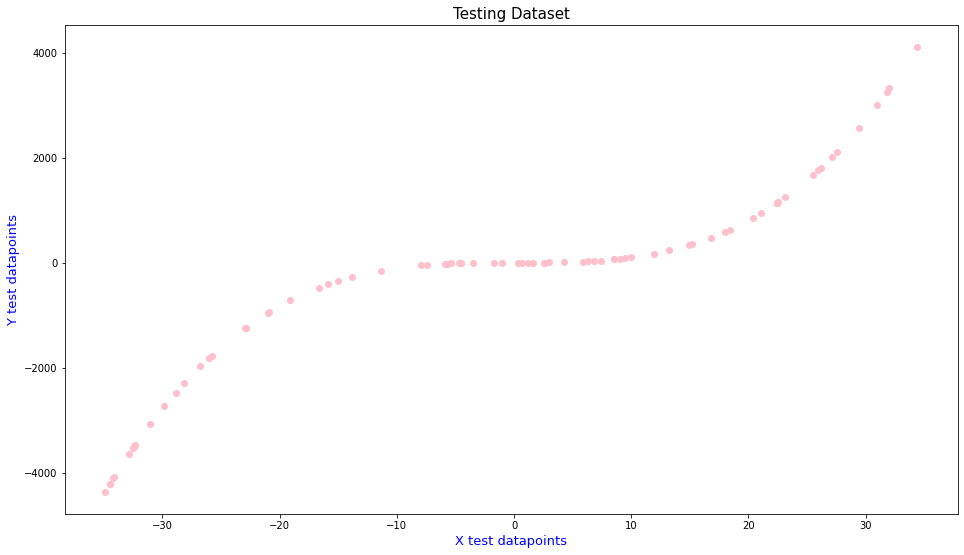

In [ ]:
# Plotting the Test set
plt.figure(figsize=(16, 9))
x_test = test['X']
y_test = test['Y']
plt.xlabel('X test datapoints', fontsize=13, color='blue')
plt.ylabel('Y test datapoints', fontsize=13, color='blue')
plt.scatter(x_test, y_test, color='pink')
plt.title('Testing Dataset', fontsize=15)
plt.show()

# Task - 2.2

In [ ]:
### (2.2.1)

# divide train dataset into 16 smaller subsets
train_split = np.split(train, num_datasets)

In [ ]:
### (2.2.2)

# training the models corresponding to each degree of polynimial fit & each training data subset that we just created randomly
models = []

# for every degree of polynomial fit (degree = 15)
for i in range(1, degrees + 1, 1):
  current_degree_model = []
  poly = PolynomialFeatures(degree = i)
  
  # for every training data subset
  for j in range(0, num_datasets, 1):
    ex = train_split[j]
    ex_x = ex['X']
    ex_y = ex['Y']
    ex_x = np.array(ex_x).reshape(-1,1)
    transformed_ex_x = poly.fit_transform(ex_x)
    ex_y = np.array(ex_y).reshape(-1,1)
    
    current_degree_model.append(LinearRegression(fit_intercept=0).fit(transformed_ex_x, ex_y))
  models.append(current_degree_model)

# Here: models[i][j] means a model trained with polynomial fit of i and using training data subset j

In [ ]:
# Calculating the Bias, Variance and Total Error using the models and test dataset
test_x = test['X']
test_y = test['Y']
ex_x = np.array(test_x).reshape(-1,1)
ex_y = np.array(test_y).reshape(-1,1)
squared_bias, bias, variance, mse, results = [], [], [], [], []

# for every degree of polynomial fit
for i in range(1,degrees+1,1):
  shape = test_y.shape
  cum_f_cap = np.zeros(shape)
  cum_f_cap = cum_f_cap.reshape(-1,1)
  cum_var = np.zeros(shape)
  cum_var = cum_var.reshape(-1,1)
  cum_err = np.zeros(shape)
  cum_err = cum_err.reshape(-1,1)

  transformed_ex_x = PolynomialFeatures(degree=i).fit_transform(ex_x)
  f_cap = []

  # for every training data subset
  for j in range(num_datasets):
    f_cap.append(models[i-1][j].predict(transformed_ex_x))
    cum_f_cap += f_cap[j]
    cum_var += f_cap[j]**2
    cum_err += (ex_y - f_cap[j])**2

  # convert cumulative values to expected values
  pred = cum_f_cap/num_datasets
  var = cum_var/num_datasets - (pred)**2
  cum_err = cum_err/num_datasets

  squared_bias.append((np.mean((pred-ex_y)**2)))
  variance.append(np.mean(var))
  results.append(pred)
  bias.append(np.mean(abs(pred-ex_y)))
  mse.append(np.mean(cum_err))

In [ ]:
# Tabualising the bias and variance
table = pd.DataFrame(np.array([bias, variance]).T)
table.columns = ['Bias', 'Variance']
table.index = range(1, degrees+1, 1)
table.round(3)

,Bias,Variance
1,573.661,18236.407
2,566.883,33505.379
3,52.295,52186.360
4,58.606,81883.863
5,57.690,89558.200
6,56.866,104817.599
7,56.505,122360.861
8,57.271,140113.264
9,59.857,150808.717
10,62.394,166866.657


# Task - 2.3

In [ ]:
# Calculating Irreducible Error
irreducible_error = np.array(mse) - (np.array(squared_bias) + np.array(variance))

In [ ]:
# Tabualising the degree and Irreducible Error
table = pd.DataFrame(np.array([[i for i in range(1, degrees+1)], irreducible_error]).T)
table.columns = ['Degree', 'Irreducible Error']
table.index = range(1, degrees+1, 1)
table.round(20)

,Degree,Irreducible Error
1,1.0,2.328306e-10
2,2.0,-3.492460e-10
3,3.0,-1.455192e-10
4,4.0,2.037268e-10
5,5.0,-8.731149e-11
6,6.0,-1.891749e-10
7,7.0,8.731149e-11
8,8.0,2.328306e-10
9,9.0,5.820766e-11
10,10.0,-2.910383e-11


# Task - 2.4

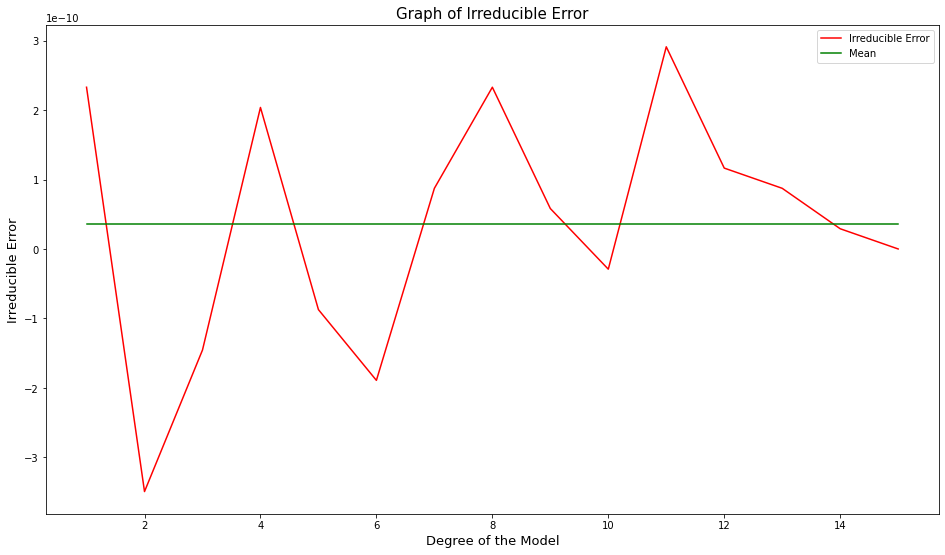

In [ ]:
# graph for irreducible error
plt.figure(figsize=(16, 9))
plt.ylabel('Irreducible Error', fontsize=13)
plt.title('Graph of Irreducible Error', fontsize=15)
plt.xlabel('Degree of the Model', fontsize=13)
plt.plot(range(1,degrees+1), irreducible_error, color = 'red')
mean_array = np.ones(irreducible_error.shape)*np.mean(irreducible_error)
plt.plot(range(1,degrees+1), mean_array,  color = 'green')
plt.legend(['Irreducible Error', 'Mean'])

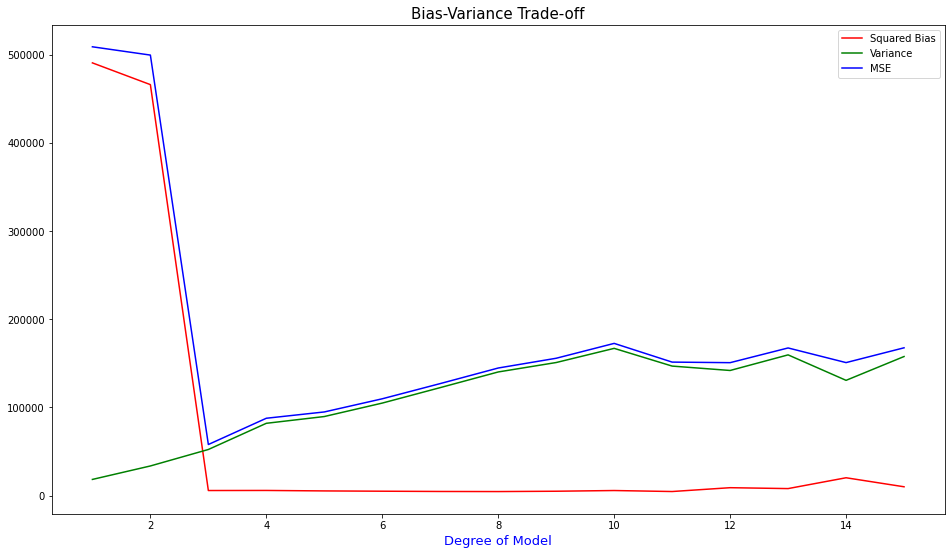

In [ ]:
# depicting the bias-variance tradeoff
plt.figure(figsize=(16, 9))
plt.plot(range(1,degrees+1), squared_bias,  color = 'red')
plt.plot(range(1,degrees+1), variance,  color = 'green')
plt.plot(range(1,degrees+1), mse,  color = 'blue')

plt.xlabel('Degree of Model', fontsize=13, color = 'blue')
plt.title('Bias-Variance Trade-off', fontsize=15)
plt.legend(['Squared Bias', 'Variance', 'MSE'])

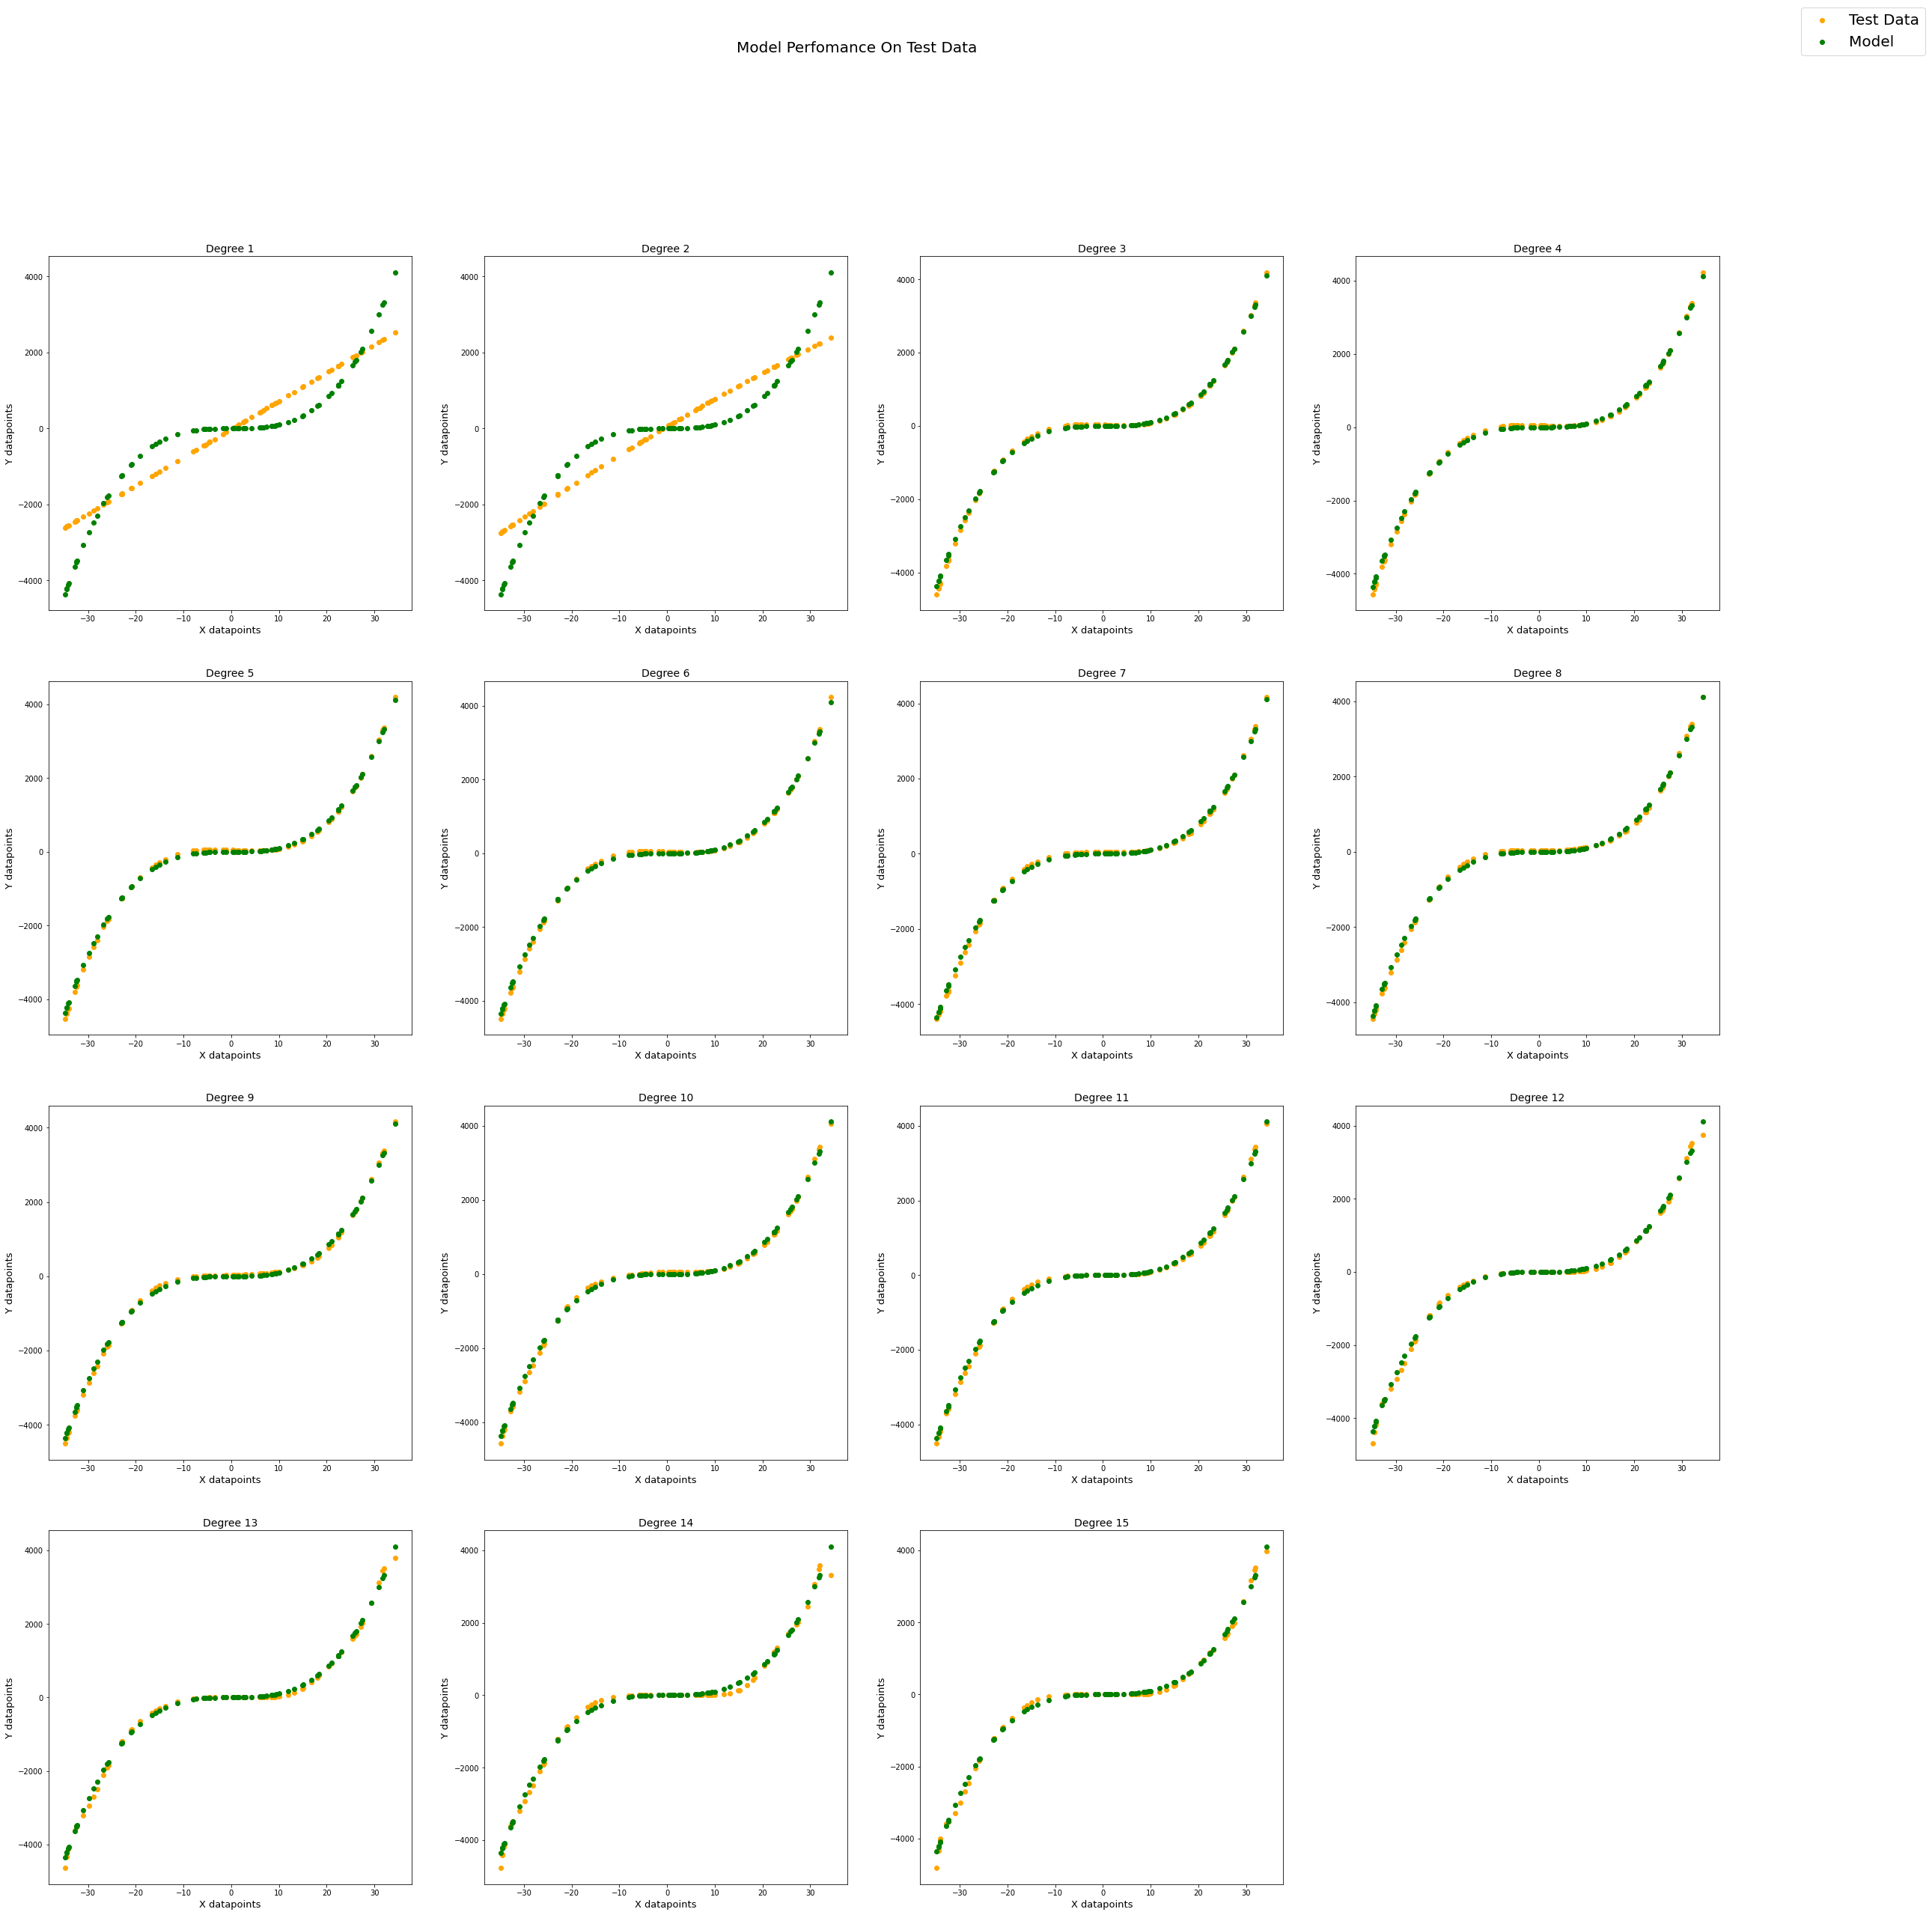

In [ ]:
# Plotting the predictions for various degrees
figSize = 40
text_x = test['X']
text_y = test['Y']
plt.figure(figsize=(figSize,figSize))
for i in range(1,degrees+1, 1):
  plt.subplot(4, 4, i)
  plt.xlabel('X datapoints', fontsize=13)
  plt.ylabel('Y datapoints', fontsize=13)
  plt.scatter(text_x, results[i-1], color = 'orange')
  plt.scatter(text_x, text_y, color = 'green')
  plt.title('Degree ' + str(i), fontsize=14)
plt.figlegend(['Test Data', 'Model'], fontsize=20)
plt.suptitle("Model Perfomance On Test Data", fontsize=20)
plt.savefig('testModelImage.png')
plt.show()